In [86]:
#Pandasとseabornをインポート
import pandas as pd
import seaborn as sns

#データの準備
df = pd.read_csv('/content/EC_sample.csv')
df

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,182,4310.00
2,75,31,1797.24
3,19,73,1757.55
4,310,17,334.40
...,...,...,...
4334,278,10,180.60
4335,181,7,80.82
4336,8,12,178.05
4337,4,756,2094.88


In [87]:
#Recency（最新購買日）
#Frequency（購買頻度）
#Monetary（購買金額）

df.shape

(4339, 3)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
#transfrom
X = df.to_numpy()
scaler.fit(X)


StandardScaler()

In [90]:
X_scaled  = scaler.transform(X)
X_scaled

array([[ 2.33485829e+00, -3.96512139e-01,  8.35963391e+00],
       [-9.05199314e-01,  3.94687670e-01,  2.51046358e-01],
       [-1.75186336e-01, -2.65374049e-01, -2.85464504e-02],
       ...,
       [-8.45198247e-01, -3.48428173e-01, -2.08712435e-01],
       [-8.85198958e-01,  2.90379646e+00,  4.57171586e-03],
       [-4.95192025e-01, -9.48945321e-02, -2.40912314e-02]])

In [91]:
#クラスター数は色々と試す
#クラスター数は３とする

#KMeansクラスをインポート
#標準化済みデータX_scaledを用いてクラスタリングを実行

from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=0)
model.fit(X_scaled)

KMeans(n_clusters=5, random_state=0)

In [92]:
#属するクラスターのラベルを確認

model.labels_

array([1, 4, 4, ..., 4, 1, 4], dtype=int32)

In [93]:
#データセットに、クラスター列としてラベル情報を追加
df['cluster'] = model.labels_
df.head()

,Recency,Frequency,Monetary,cluster
0,326,1,77183.60,1
1,2,182,4310.00,4
2,75,31,1797.24,4
3,19,73,1757.55,4
4,310,17,334.40,0


<Axes: xlabel='cluster', ylabel='count'>

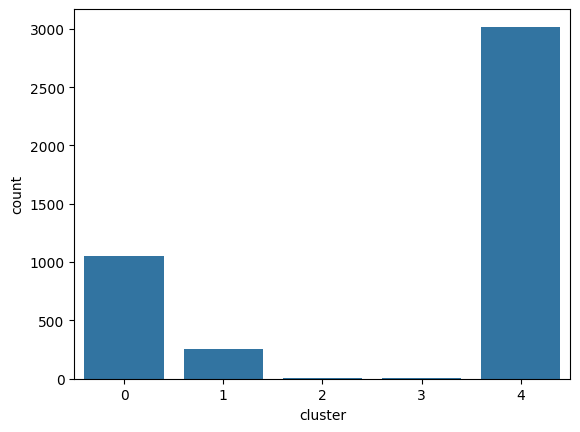

In [94]:
#クラスター別のデータ数の確認
sns.countplot(x='cluster', data=df)

In [95]:
#クラスター別に各列の平均値を確認
df.groupby('cluster').mean()

,Recency,Frequency,Monetary
cluster,,,
0,249.476777,27.793365,490.446645
1,16.203125,475.914062,11532.292266
2,2.000000,5807.750000,70925.287500
3,7.666667,827.833333,190863.461667
4,44.412525,72.422134,1329.634842


<Axes: xlabel='Frequency', ylabel='Monetary'>

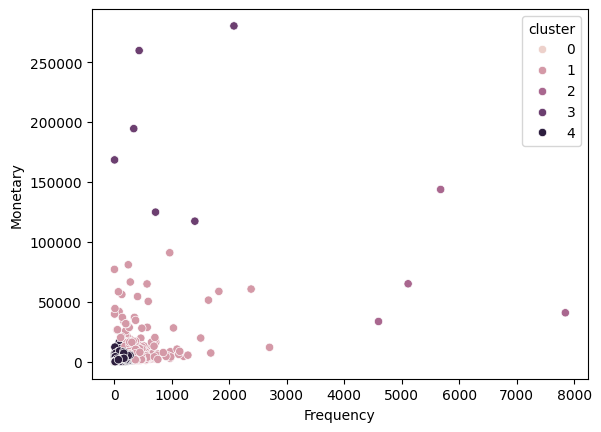

In [96]:
#seabornのscatterplot関数を利用

sns.scatterplot(x='Frequency', y='Monetary', hue='cluster', data=df)

<Axes: xlabel='Recency', ylabel='Monetary'>

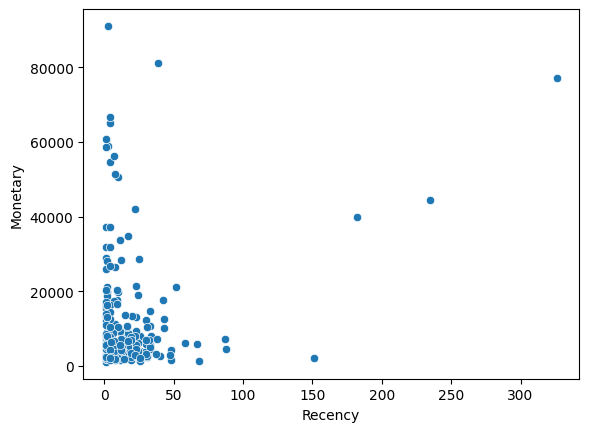

In [97]:
#新規のリピーターを考えてみる
#頻度と金額が共に低い、クラスター１に絞り、最近の購買頻度が高い層がどれだけ存在するか

df_cluster1 = df.query('cluster == 1')
sns.scatterplot(x='Recency', y='Monetary', data=df_cluster1)

Axes(0.125,0.11;0.775x0.77)


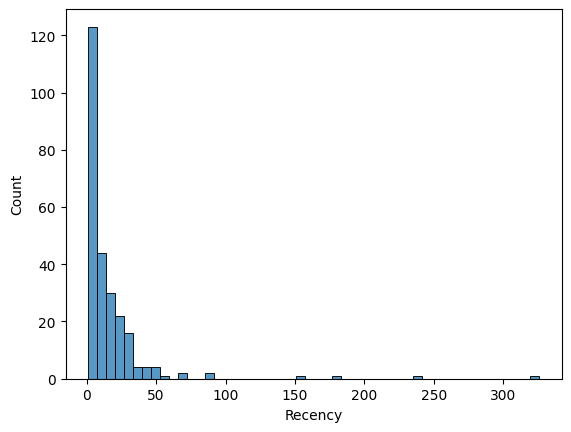

In [98]:
#クラスター１は直近の購買日５０日以前で増えている
print(sns.histplot(x='Recency', data=df_cluster1, bins=50))

Axes(0.125,0.11;0.775x0.77)


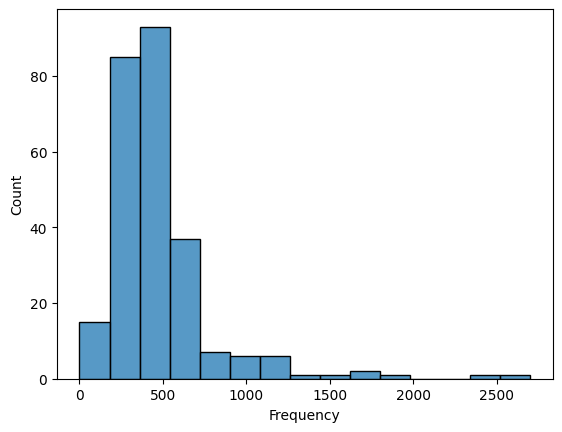

In [99]:
#クラスター１の頻度は５００に集中
print(sns.histplot(x='Frequency', data=df_cluster1, bins=15))

<Axes: xlabel='Recency', ylabel='Monetary'>

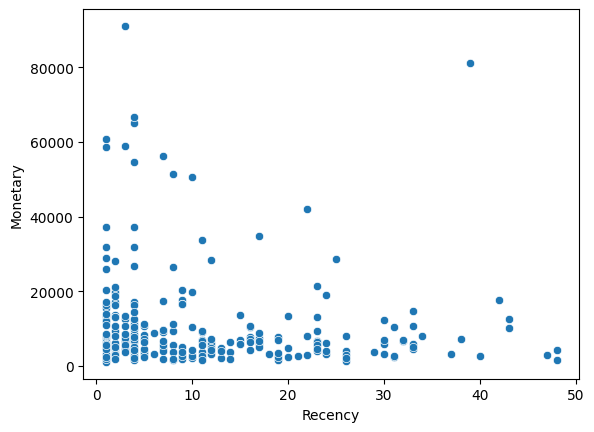

In [100]:
#最新購買日から50日以前？に絞り、どのくらいの金額を購入したかを考える
sns.scatterplot(x='Recency', y='Monetary', data=df_cluster1.query('`Recency` < 50'))